In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
import operator
import pickle

In [3]:
# load the dataset
filename = 'model/linear_regression_gas_TempOnly.sav'
file = '../data/Total_consumption_Coal_gas_petroleum_population_Texas_monthly_interp.csv'
dataframe = pd.read_csv(file)
dataframe

,year,month,Coal,gas,petroleum,Total_source,Total_source_corrected_population,Av Temp,Max Temp,Min Temp,population
0,2001,Jan,8002.784,147019.775,2583.823,157606.382,0.007408,43.9,54.3,33.5,21274049.67
1,2001,Feb,7220.569,126392.659,486.212,134099.440,0.006293,51.9,63.5,40.4,21309235.47
2,2001,Mar,7610.386,144803.647,257.670,152671.703,0.007153,53.3,64.0,42.6,21344421.28
3,2001,Apr,6900.272,155112.540,139.903,162152.715,0.007584,67.8,79.9,55.6,21379607.09
4,2001,May,8163.586,174142.911,65.535,182372.032,0.008516,74.1,86.4,61.8,21414792.89
5,2001,Jun,8515.072,192696.004,32.646,201243.722,0.009382,80.9,93.2,68.5,21449978.70
6,2001,Jul,9325.170,236109.652,27.770,245462.592,0.011425,85.1,97.4,72.7,21485164.50
7,2001,Aug,9099.212,237944.547,34.644,247078.403,0.011481,82.8,94.7,70.9,21520350.30
8,2001,Sep,8250.066,181522.560,17.615,189790.241,0.008805,74.9,86.6,63.1,21555536.11
9,2001,Oct,6828.589,163557.882,35.783,170422.254,0.007893,65.4,79.1,51.7,21590721.92


### Add a decimal month to year

In [4]:
yr = dataframe["year"]
mo = dataframe["month"].str.lower()

mo[0:13]

0     jan
1     feb
2     mar
3     apr
4     may
5     jun
6     jul
7     aug
8     sep
9     oct
10    nov
11    dec
12    jan
Name: month, dtype: object

In [5]:
step = 1/12
yr_decimal = []

for i in range (len(dataframe)):
    if (mo[i] == 'jan'):
        decinal_mo = 0
    elif (mo[i] == 'feb'):
        decinal_mo = 1
    elif (mo[i] == 'mar'):
        decinal_mo = 2
    elif (mo[i] == 'apr'):
        decinal_mo = 3
    elif (mo[i] == 'may'):
        decinal_mo = 4
    elif (mo[i] == 'jun'):
        decinal_mo = 5
    elif (mo[i] == 'jul'):
        decinal_mo = 6
    elif (mo[i] == 'aug'):
        decinal_mo = 7
    elif (mo[i] == 'sep'):
        decinal_mo = 8
    elif (mo[i] == 'oct'):
        decinal_mo = 9
    elif (mo[i] == 'nov'):
        decinal_mo = 10
    elif (mo[i] == 'dec'):
        decinal_mo = 11
    
    yr_decimal.append(yr[i]+decinal_mo * step)
    
yr_decimal[0:25]

[2001.0,
 2001.0833333333333,
 2001.1666666666667,
 2001.25,
 2001.3333333333333,
 2001.4166666666667,
 2001.5,
 2001.5833333333333,
 2001.6666666666667,
 2001.75,
 2001.8333333333333,
 2001.9166666666667,
 2002.0,
 2002.0833333333333,
 2002.1666666666667,
 2002.25,
 2002.3333333333333,
 2002.4166666666667,
 2002.5,
 2002.5833333333333,
 2002.6666666666667,
 2002.75,
 2002.8333333333333,
 2002.9166666666667,
 2003.0]

In [6]:
dataframe['yr_decimal'] = yr_decimal
dataframe.head()

,year,month,Coal,gas,petroleum,Total_source,Total_source_corrected_population,Av Temp,Max Temp,Min Temp,population,yr_decimal
0,2001,Jan,8002.784,147019.775,2583.823,157606.382,0.007408,43.9,54.3,33.5,21274049.67,2001.000000
1,2001,Feb,7220.569,126392.659,486.212,134099.440,0.006293,51.9,63.5,40.4,21309235.47,2001.083333
2,2001,Mar,7610.386,144803.647,257.670,152671.703,0.007153,53.3,64.0,42.6,21344421.28,2001.166667
3,2001,Apr,6900.272,155112.540,139.903,162152.715,0.007584,67.8,79.9,55.6,21379607.09,2001.250000
4,2001,May,8163.586,174142.911,65.535,182372.032,0.008516,74.1,86.4,61.8,21414792.89,2001.333333


In [7]:
dataframe = dataframe.drop(['year', 'month'], axis =1)
dataframe.head()

,Coal,gas,petroleum,Total_source,Total_source_corrected_population,Av Temp,Max Temp,Min Temp,population,yr_decimal
0,8002.784,147019.775,2583.823,157606.382,0.007408,43.9,54.3,33.5,21274049.67,2001.000000
1,7220.569,126392.659,486.212,134099.440,0.006293,51.9,63.5,40.4,21309235.47,2001.083333
2,7610.386,144803.647,257.670,152671.703,0.007153,53.3,64.0,42.6,21344421.28,2001.166667
3,6900.272,155112.540,139.903,162152.715,0.007584,67.8,79.9,55.6,21379607.09,2001.250000
4,8163.586,174142.911,65.535,182372.032,0.008516,74.1,86.4,61.8,21414792.89,2001.333333


In [8]:
coal = dataframe['Coal'].values
gas = dataframe['gas'].values
petroleum = dataframe['petroleum'].values
ave_temp =  dataframe['Av Temp'].values
min_temp =  dataframe['Min Temp'].values
max_temp =  dataframe['Max Temp'].values
pop =  dataframe['population'].values
total =  dataframe['Total_source'].values

values = dataframe.values

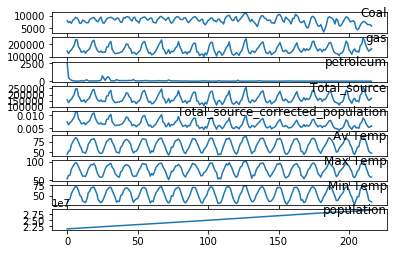

In [9]:
groups = [ 0, 1, 2, 3, 4,5 , 6 , 7 , 8]
i = 1

plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataframe.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

Text(0, 0.5, 'Gas consumption')

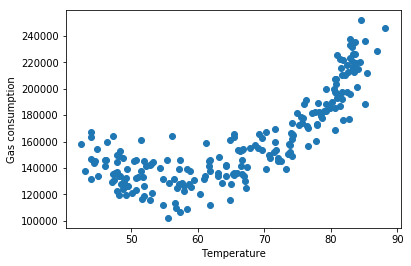

In [10]:
plt.figure()
plt.scatter(ave_temp , gas)
#plt.scatter(min_temp , gas , label = 'min')
#plt.scatter(max_temp , gas , label = 'max')
plt.xlabel('Temperature')
plt.ylabel('Gas consumption')


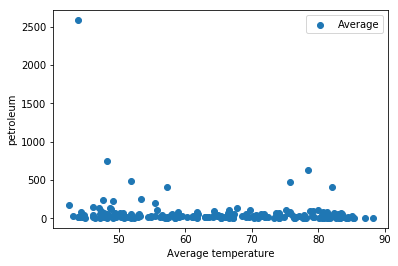

In [11]:

plt.figure()
plt.scatter( ave_temp , petroleum, label='Average')
plt.xlabel('Average temperature')
plt.ylabel('petroleum')
plt.legend()


Text(0, 0.5, 'Petroleum consumption')

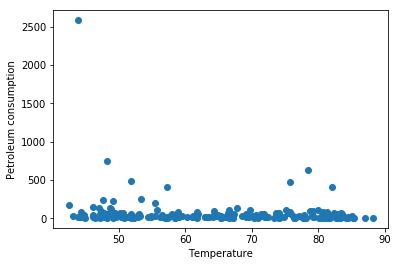

In [12]:
plt.figure()
plt.scatter( ave_temp , petroleum, label='Average')
plt.xlabel('Temperature')
plt.ylabel('Petroleum consumption')



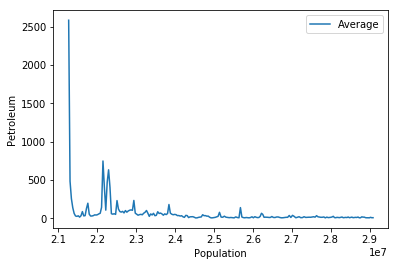

In [13]:

plt.figure()
plt.plot( pop , petroleum, label='Average')
plt.xlabel('Population')
plt.ylabel('Petroleum')
plt.legend()


Text(0, 0.5, 'Coal consumption')

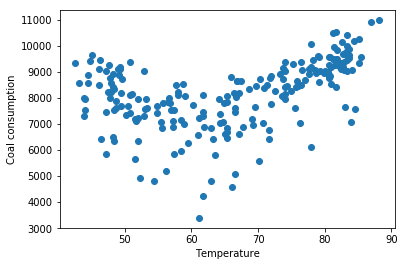

In [14]:
plt.figure()
plt.scatter(ave_temp, coal, label='Average')
plt.xlabel('Temperature')
plt.ylabel('Coal consumption')

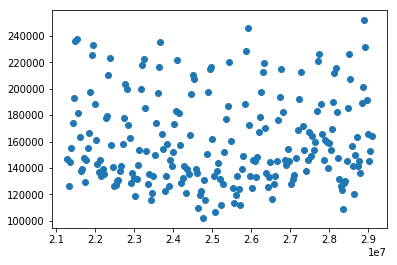

In [15]:
plt.figure()
plt.scatter(pop, gas, label='Average')

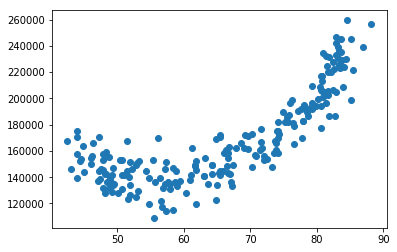

In [16]:
plt.figure()
plt.scatter(ave_temp, total, label='Average')

(40, 90, 0.0, 1.5)

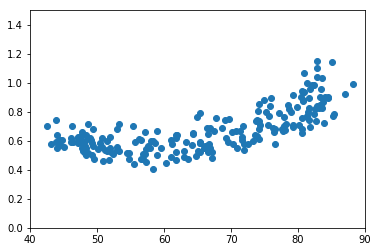

In [17]:
plt.figure()
plt.scatter(ave_temp, total/pop*100, label='Average')
plt.axis((40,90,0.0,1.5))

### Deep-learning code

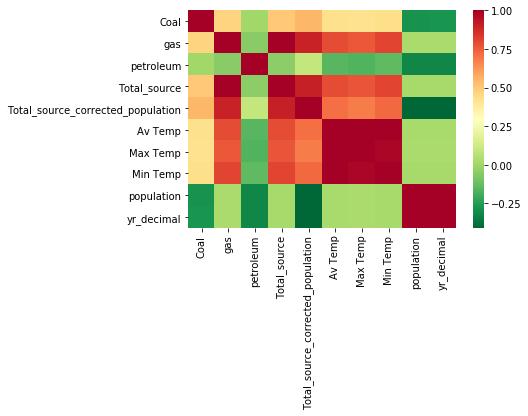

In [18]:

import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = dataframe.corr()

cmap = 'RdYlGn_r'


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap= cmap)

In [19]:
dataframe.head()

,Coal,gas,petroleum,Total_source,Total_source_corrected_population,Av Temp,Max Temp,Min Temp,population,yr_decimal
0,8002.784,147019.775,2583.823,157606.382,0.007408,43.9,54.3,33.5,21274049.67,2001.000000
1,7220.569,126392.659,486.212,134099.440,0.006293,51.9,63.5,40.4,21309235.47,2001.083333
2,7610.386,144803.647,257.670,152671.703,0.007153,53.3,64.0,42.6,21344421.28,2001.166667
3,6900.272,155112.540,139.903,162152.715,0.007584,67.8,79.9,55.6,21379607.09,2001.250000
4,8163.586,174142.911,65.535,182372.032,0.008516,74.1,86.4,61.8,21414792.89,2001.333333


In [20]:
dataframe = dataframe.drop(['yr_decimal', 'population', 'petroleum'], axis =1)
dataframe.head()

,Coal,gas,Total_source,Total_source_corrected_population,Av Temp,Max Temp,Min Temp
0,8002.784,147019.775,157606.382,0.007408,43.9,54.3,33.5
1,7220.569,126392.659,134099.440,0.006293,51.9,63.5,40.4
2,7610.386,144803.647,152671.703,0.007153,53.3,64.0,42.6
3,6900.272,155112.540,162152.715,0.007584,67.8,79.9,55.6
4,8163.586,174142.911,182372.032,0.008516,74.1,86.4,61.8


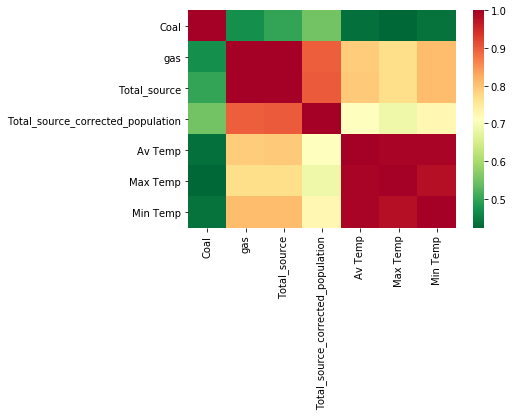

In [21]:
corr = dataframe.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap= cmap)

In [22]:
dataframe.to_csv('data_for_regression.csv',index=False)

In [23]:
dataframe = dataframe.drop(['Total_source', 'Total_source_corrected_population', 'Max Temp','Min Temp'], axis =1)


In [24]:
dataframe = dataframe.drop(['Coal'], axis =1)

In [25]:
X = dataframe.drop("gas", axis=1)
y = dataframe["gas"]
print(X.shape, y.shape)

(217, 1) (217,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

12677.602838947065
0.8549676069595569


In [28]:
poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
  # fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
  # predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

  # predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

In [30]:
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 12263.367123638722
R2 score of training set is 0.870993815922903


The model performance for the test set
-------------------------------------------
RMSE of test set is 13631.296711591645
R2 score of test set is 0.8084739562074397


In [31]:
x_plot = np.linspace(40, 90, 51)
x_plot = x_plot.reshape(-1, 1)
y_plot = poly_model.predict(poly_features.fit_transform(x_plot))

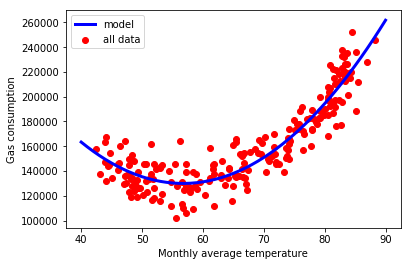

In [32]:
plt.figure()
plt.scatter(X, y, color='red',label='all data')
plt.plot(x_plot, y_plot, color='blue', linewidth=3, label='model')
plt.xlabel('Monthly average temperature')
plt.ylabel('Gas consumption')
plt.legend()


In [33]:
# save the model to disk

pickle.dump(poly_model, open(filename, 'wb'))

In [34]:
# printing values
print('Slope:' ,poly_model.coef_)
print('Intercept:', poly_model.intercept_)
print()
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [     0.         -13526.82606286    119.19083416]
Intercept: 513755.9046784076

Root mean squared error:  12677.602838947065
R2 score:  0.8549676069595569


In [35]:
coef = poly_model.coef_
intercept = poly_model.intercept_

Text(0, 0.5, 'Gas consumption')

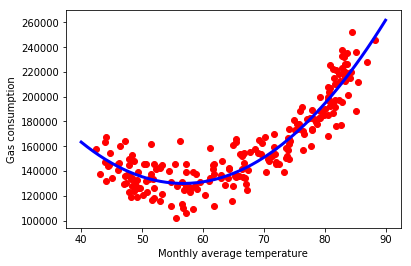

In [36]:
# test to get the equation

x_plot = np.linspace(40, 90, 51)
x_plot = x_plot.reshape(-1, 1)
y_plot = coef[1]*x_plot + coef[2]*x_plot*x_plot + intercept#poly_model.predict(poly_features.fit_transform(x_plot))

plt.figure()
plt.scatter(X, y, color='red')
plt.plot(x_plot, y_plot, color='blue', linewidth=3)
plt.xlabel('Monthly average temperature')
plt.ylabel('Gas consumption')